In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


# Âç∑ÁßØÂ±Ç

In [3]:
china = load_sample_image('china.jpg') / 255
flower = load_sample_image('flower.jpg') / 255

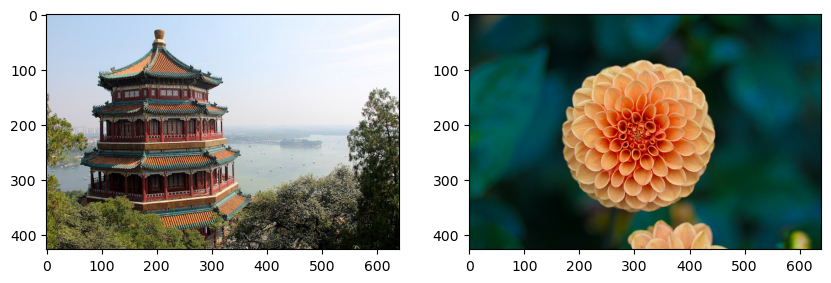

In [4]:
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(china)
plt.subplot(122)
plt.imshow(flower)

In [5]:
china.shape

(427, 640, 3)

In [6]:
images = np.array([china, flower])

In [7]:
batch_size, hight, wight, channels = images.shape

In [8]:
images.shape

(2, 427, 640, 3)

> ËØ∑ÂãøÂú®ÂÆûÈôÖÊ°à‰æã‰ΩøÁî®‰ª•‰∏ãÊñπÊ≥ïÔºå‰ªÖÊºîÁ§∫ÊâãÂä®ÊûÑÂª∫Êª§Ê≥¢Âô®

In [9]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) # ÂàõÂª∫‰∏§‰∏™7*7Êª§Ê≥¢Âô®

In [10]:
filters.shape

(7, 7, 3, 2)

In [11]:
filters[:, 3, :, 0] = 1 # ÂûÇÁõ¥Á∫øÔºåÂç≥ËÆæÂÆö‰∏∫ÂûÇÁõ¥Êª§Ê≥¢Âô®ÔºåËØïÊÉ≥ÔºåÂÖàË°åÂêéÂàóÔºöË°åÂÖ®ÈÄâÔºåÁ¨¨‰∏âÂàóÈÄâ‰∏≠ÔºåÁ∫µÔºàzËΩ¥ÔºâÂÖ®ÈÄâÔºåÁ¨¨‰∏ÄÔºà0Ôºâ‰∏™Êª§Ê≥¢Âô®ÔºåÂ°´ÂÖÖ‰∏∫1ÔºåÂç≥ÂûÇÁõ¥Êª§Ê≥¢
filters[3, :, :, 1] = 1 # Ê∞¥Âπ≥Á∫øÔºåÊ∞¥Âπ≥Êª§Ê≥¢Âô®

In [12]:
filters[..., 1]
# Á¨¨‰∏ÄÁª¥‰∏≠ÊØè‰∏™Áü©Èòµ‰ª£Ë°®‰∏ÄË°åÂÉèÁ¥†ÂùóÔºåÁü©Èòµ‰∏≠‰∏ÄË°å‰ª£Ë°®‰∏Ä‰∏™ÂÉèÁ¥†ÂùóÁöÑRGBÂÄº
# Èô§‰∫ÜÁ¨¨‰∏ÄÁª¥Á¨¨‰∏â‰∏™Áü©ÈòµÂÖ®ÈÉ®ÊòØ1ÔºàËØ•Ë°åÁôΩËâ≤ÔºâÔºåÂÖ∂‰ªñÁöÑÈÉΩÊòØ0ÔºàËØ•Ë°åÈªëËâ≤Ôºâ

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]

In [13]:
with tf.device("/cpu:0"): # Ê∑±Â∫¶ÊúÄÂ§ßÊ±†ÂåñÂè™ËÉΩÁî®CPU    
    outputs = tf.nn.max_pool(images, 
                         ksize=(1 ,1 ,1 ,3) , 
                         strides=(1 ,1 ,1 ,3), 
                         padding="VALID")

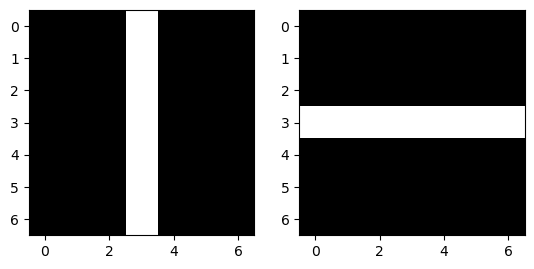

In [14]:
plt.subplot(121)
plt.imshow(filters[..., 0], cmap='gray')
plt.subplot(122)
plt.imshow(filters[..., 1], cmap='gray')

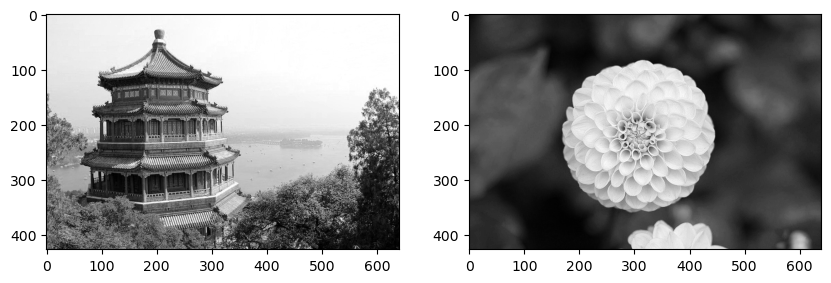

In [15]:
plt.figure(figsize=(10, 10))

plt.subplot(121)

plt.imshow(outputs[0, :, :, 0], cmap='gray')

plt.subplot(122)

plt.imshow(outputs[1, :, :, 0], cmap='gray')

> TFÂ∑≤ÁªèÁªô‰∫ÜÊûÑÂª∫Êª§Ê≥¢Âô®ÁöÑÂáΩÊï∞Â¶Ç‰∏ãÔºåÂÆÉÂèØ‰ª•Ë¢´ËÆ≠ÁªÉÂõ†Ê≠§‰∏çÁî®ÂÖ∑‰ΩìÂÆö‰πâÊª§Ê≥¢Âô®

In [16]:
conv = keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')
# Êª§Ê≥¢Âô®Êï∞ÈáèÔºåÈ´òÂÆΩÔºàÊñπÂΩ¢È´òÂÆΩ‰∏ÄËá¥ÔºâÔºåÊ≠•ÂπÖÔºåÂ°´ÂÖÖÁ±ªÂûãÔºåÊøÄÊ¥ªÂáΩÊï∞

# Ê±†ÂåñÂ±Ç

Ê±†ÂåñÂ±ÇÂè™‰øùÁïôÊ†∏ÂÜÖÊúÄÂ§ßÂÄºÔºàÊàñÂπ≥ÂùáÂÄºÔºâÔºåÂ§ßÂπÖÂéãÁº©ÂõæÂÉèÔºåÂÖ∑Êúâ‰∏ÄÂÆöÁ†¥ÂùèÊÄß

In [17]:
max_pool = keras.layers.MaxPool2D(pool_size=2) # Âπ≥ÂùáÊ±†ÂåñÂ±Ç‰ΩøÁî® Avgpool2D()

In [18]:
# Keras‰∏çÂåÖÊã¨Ê∑±Â∫¶ÊúÄÂ§ßÊ±†ÂåñÂ±ÇÔºåTFÁöÑ‰ΩéÂ±ÇÊ∑±Â∫¶Â≠¶‰π†APIÂåÖÊã¨
with tf.device("/cpu:0"): # Ê∑±Â∫¶ÊúÄÂ§ßÊ±†ÂåñÂè™ÊîØÊåÅCPU
    output = tf.nn.max_pool(images,
                       ksize=(1, 1, 1, 3),
                       strides=(1, 1, 1, 3),
                       padding='VALID')
# ÂÜÖÊ†∏Â§ßÂ∞èÂíåÊ≠•ÂπÖÊåáÂÆö‰∏∫4ÂÖÉÁªÑÔºåÂâç‰∏â‰∏™ÂÄºÂùá‰∏∫1ÔºöÂç≥ÂÜÖÊ†∏Â§ßÂ∞è„ÄÅÊ≠•ÂπÖÂíåÊâπÈáèÂ§ÑÁêÜ„ÄÅÈ´òÂ∫¶ÂÆΩÂ∫¶Â∫î‰∏∫1Ôºå
# ÊúÄÂêé‰∏Ä‰∏™Â∫îËØ•‰∏∫Ê≤øÊ∑±Â∫¶Áª¥Â∫¶ÊâÄÈúÄÁöÑÂÜÖÊ†∏Â§ßÂ∞èÂíåË∑®Â∫¶ÔºåÂ¶Ç3ÔºåÂøÖÈ°ªÊòØËæìÂÖ•Ê∑±Â∫¶ÁöÑÈô§Êï∞ÔºåÂ¶ÇÊûú‰∏ä‰∏ÄÂ±ÇËæìÂá∫20ÔºåÂàôÊó†ÊïàÔºåÂõ†‰∏∫20‰∏çÊòØ3ÁöÑÂÄçÊï∞

In [19]:
# ‰πüÂèØ‰ª•ÂåÖË£ÖÂú®kerasÂÜÖ
depth_pool = keras.layers.Lambda(
    lambda X: tf.nn.max_pool(X, ksize=(1, 1, 1, 3), strides=(1, 1, 1, 3), padding='VALID'))

# Ë∞ÉÁî® depth_pool(image)ÔºåËæìÂÖ•ÂõæÂÉèÂç≥ÂèØ

In [20]:
'''Áé∞‰ª£ÊûÑÊû∂‰∏≠ÁªèÂ∏∏‰ºöÁúãÂà∞ÊúÄÂêé‰∏ÄÁßçÊ±†ÂåñÂ±ÇÊòØÂÖ®Â±ÄÂπ≥ÂùáÊ±†ÂåñÂ±ÇÔºåÂÆÉËÆ°ÁÆóÊï¥‰∏™ÁâπÂæÅÂõæÁöÑÂùáÂÄºÔºåÊÑèÂë≥ÁùÄÊØè‰∏™ÁâπÂæÅÂõæÂè™ËæìÂá∫‰∏Ä‰∏™ÂçïÂÄºÔºåÊûÅÂÖ∑Á†¥ÂùèÊÄß
‰ΩÜÂÆÉÂèØ‰ª•‰ΩúÁî®ËæìÂá∫Â±Ç'''
global_avg_pool = keras.layers.GlobalAveragePooling2D()
# Á≠âÊïà‰∫é
global_avd_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

# CNNÊûÑÊû∂

In [21]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True) # ÂùáÂÄº
X_std = X_train.std(axis=0, keepdims=True) + 1e-7 # Ê†áÂáÜÂ∑Æ
X_train = (X_train - X_mean) / X_std # ËÆ≠ÁªÉÈõÜÊ†áÂáÜÂåñ
X_valid = (X_valid - X_mean) / X_std # È™åËØÅÈõÜÊ†áÂáÜÂåñ
X_test = (X_test - X_mean) / X_std # ÊµãËØïÈõÜÊ†áÂáÜÂåñ

In [22]:
X_train.shape

(55000, 28, 28)

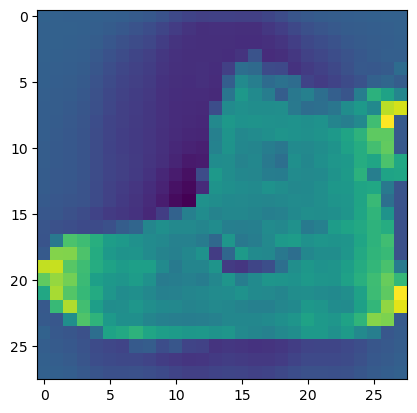

In [23]:
plt.imshow(X_train[0,...])

In [24]:
X_train = X_train[..., np.newaxis] # Â¢ûÂä†‰∏Ä‰∏™Áª¥Â∫¶,ÊöÇÊó∂‰∏çÊ∏ÖÊ•ö‰∏∫‰ªÄ‰πà
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [25]:
X_train[0,1,5]

array([-0.1306924])

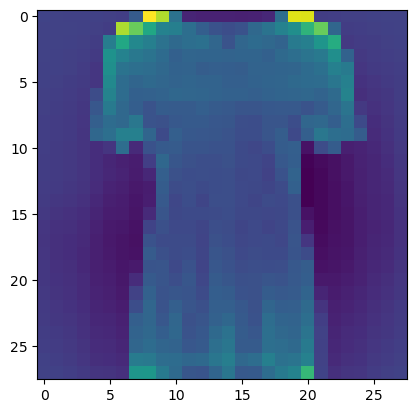

In [26]:
plt.imshow(X_train[10])

## ÂÆö‰πâÊ®°Âûã

In [30]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, 
                       activation='relu', 
                       padding='same',
                       input_shape=[28, 28, 1]), 
    # üëÜ 64‰∏™Êª§Ê≥¢Âô®ÔºåÊ†∏È´òÂÆΩ7ÔºàÂç∑ÁßØÂ±ÇÔºâÔºåÊ†∏Ë∂äÂ§ß‰øùÁïô‰ø°ÊÅØË∂äÂ§ö 
    keras.layers.MaxPool2D(2), # Ê±†ÂåñÂ±ÇÔºåÂ§ßÂ∞è2ÔºåÂú®ÊØè‰∏™Áª¥Â∫¶Èô§‰ª•2(Á≠â‰∫éÊ≠•ÂπÖ)
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    # ÈáçÂ§çÊª§Ê≥¢„ÄÅÊ±†ÂåñÔºåÊØèÊ±†Âåñ‰∏ÄÊ¨°ÔºåÊª§Ê≥¢Âô®Êï∞ÁêÜÂä†ÂÄçÔºåÂõ†‰∏∫Ê±†ÂåñÂêéÁ©∫Èó¥Áª¥Â∫¶Èô§‰ª•2Ôºå‰∏çÁî®ÊãÖÂøÉÂèÇÊï∞ÁàÜÁÇ∏Â¢ûÈïø
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation="relu", padding='same'),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(), # ÊääÂõæÂÉèËΩ¨‰∏∫‰∏ÄÁª¥Êï∞ÁªÑÔºåÊé•‰∏äÂÖ®ËøûÊé•ÁΩëÁªú
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5), # ÊØèÊ¨°drop‰∏ÄÂçäÁ•ûÁªèÂÖÉÈò≤Ê≠¢ËøáÊãüÂêà
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax"), # 10ÂàÜÁ±ª
    ])

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 256)        

In [28]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 35s 17ms/step - loss: 0.7312 - accuracy: 0.7455 - val_loss: 0.3623 - val_accuracy: 0.8638
Epoch 2/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.4332 - accuracy: 0.8544 - val_loss: 0.3635 - val_accuracy: 0.8686
Epoch 3/5
1719/1719 [==============================] - 28s 16ms/step - loss: 0.3734 - accuracy: 0.8735 - val_loss: 0.2979 - val_accuracy: 0.8932
Epoch 4/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3378 - accuracy: 0.8845 - val_loss: 0.3386 - val_accuracy: 0.8820
Epoch 5/5
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3104 - accuracy: 0.8944 - val_loss: 0.2999 - val_accuracy: 0.8920


<Axes: >

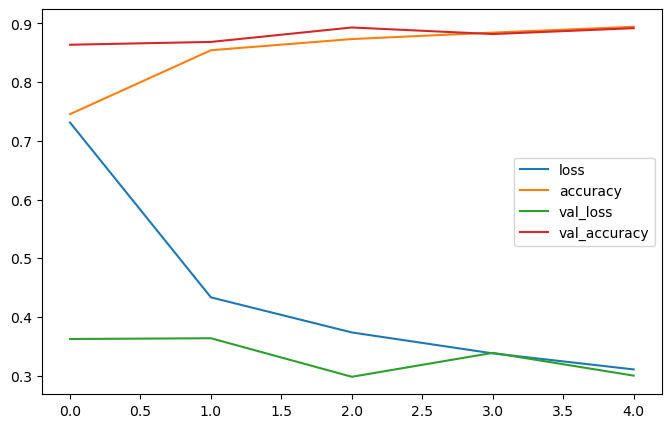

In [29]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))